## <font color=blue> Used Car Prediction using Linear Regression </font>

In [1]:
# Importing packages for Data analysing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing packages for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# For better data visualization
sns.set_context("notebook")
pd.set_option('display.max_columns',50)

## Step 1: Data Reading and Inspection

- Task 1.1: Read the data frame
- Task 2.2: Inspect the dataframe


**Task 1.1: Reading the dataframe**

In [2]:
usedcar_train = pd.read_csv("train.csv")
usedcar_test = pd.read_csv("test.csv")

In [3]:
usedcar_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [4]:
usedcar_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh


**Task 2.2: Inspecting the dataframe**

In [5]:
print(usedcar_train.shape)
print(usedcar_test.shape)

(6019, 13)
(1234, 12)


In [6]:
usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
usedcar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [8]:
usedcar_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
usedcar_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [10]:
#checking the percentage of NULL values
usedcar_train.isna().mean().round(4)*100

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [11]:
usedcar_test.isna().mean().round(4)*100

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.00
Engine                0.81
Power                 0.81
Seats                 0.89
New_Price            85.25
dtype: float64

**Observation:** 
- The variable 'New price' has a significant percentage of Null value and so this variable will not be helpful for further analysis. Hence, this variable can be dropped
- Similarly, the variables 'Engine, Power, Mileage and Seats' have less than 1% of missing values, thus dropping them would not affect the analysis of the dataframe
- Since there are few null values in test dataset, they can be dropped as well

## Step 2: Data Cleaning

The data has to be cleaned and processed to make visualization analysis easier

In [12]:
# Removing the string appends for better analysis since it is clear that fuel vehicles use kmpl and CNG use km/kg
usedcar_train['Mileage'] = usedcar_train['Mileage'].apply(lambda x: str(x).strip('km/kgpl'))
usedcar_train['Power'] = usedcar_train['Power'].apply(lambda x: str(x).strip('bhp'))
usedcar_train['Engine'] = usedcar_train['Engine'].apply(lambda x: str(x).strip('CC'))

# Doing the same changes for test dataset as well
usedcar_test['Mileage'] = usedcar_test['Mileage'].apply(lambda x: str(x).strip('km/kgpl'))
usedcar_test['Power'] = usedcar_test['Power'].apply(lambda x: str(x).strip('bhp'))
usedcar_test['Engine'] = usedcar_test['Engine'].apply(lambda x: str(x).strip('CC'))


In [13]:
# Inspecting the unique values to check if there are any other forms of missing values
for col in usedcar_train.columns:
    print(col+':')
    print(usedcar_train[col].unique())
    print('\n-----------------------------\n')

Name:
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']

-----------------------------

Location:
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

-----------------------------

Year:
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]

-----------------------------

Kilometers_Driven:
[72000 41000 46000 ... 45004 70602 27365]

-----------------------------

Fuel_Type:
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

-----------------------------

Transmission:
['Manual' 'Automatic']

-----------------------------

Owner_Type:
['First' 'Second' 'Fourth & Above' 'Third']

-----------------------------

Mileage:
['26.6 ' '19.67 ' '18.2 ' '20.77 ' '15.2 ' '21.1 ' '23.08 ' '11.36 '
 '20.54 ' '22.3 ' '21.56 ' '16.8 ' '25.2 ' '12.7 ' '0.0 ' '13.5 ' 

In [14]:
for col in usedcar_test.columns:
    print(col+':')
    print(usedcar_test[col].unique())
    print('\n-----------------------------\n')

Name:
['Maruti Alto K10 LXI CNG' 'Maruti Alto 800 2016-2019 LXI'
 'Toyota Innova Crysta Touring Sport 2.4 MT' 'Toyota Etios Liva GD'
 'Hyundai i20 Magna' 'Mahindra XUV500 W8 2WD'
 'Toyota Fortuner 4x2 AT TRD Sportivo' 'Hyundai EON Era Plus'
 'Honda City 1.5 S MT' 'Mahindra XUV500 W6 2WD'
 'Audi Q5 2008-2012 2.0 TDI' 'Hyundai Grand i10 Magna' 'Toyota Corolla H5'
 'Maruti Swift Vdi BSIII' 'Nissan Terrano XL' 'BMW X1 sDrive20d'
 'BMW 3 Series GT 320d Luxury Line' 'Ford Ikon 1.4 TDCi DuraTorq'
 'Maruti Swift AMT ZXI' 'Maruti Swift Dzire VXi' 'Maruti Ritz LDi'
 'Nissan Micra XV' 'Skoda Laura 1.8 TSI Ambition'
 'Honda Civic 2010-2013 1.8 S MT Inspire' 'Ford Ikon 1.3 Flair'
 'Maruti Alto LX' 'Honda Jazz 1.5 V i DTEC'
 'Skoda Rapid 1.5 TDI AT Ambition' 'Hyundai i20 1.2 Sportz'
 'Toyota Etios Cross 1.4L VD' 'Volkswagen Polo GT TDI'
 'Hyundai i10 Era 1.1 iTech SE' 'Mitsubishi Pajero 2.8 SFX'
 'Maruti Swift Dzire Tour LDI' 'Maruti Swift Dzire VXI'
 'Skoda Rapid 1.6 MPI AT Style'
 'Hyundai Creta 1

**Observation:** There are some hardcoded null values in the variable 'Power' for train dataset. These records can be dropped as well

In [15]:
# Finding the number of records with null values
usedcar_train[usedcar_train.Power == 'null '].shape[0]/usedcar_train.shape[0] *100

1.7777039375311512

Since the percentage of values is very less. These rows can be dropped rather than imputing with median values

In [16]:
# Replacing the hard coded null strings with null values
usedcar_train.loc[usedcar_train['Power'] == 'null '] = np.nan
usedcar_test.loc[usedcar_test['Power'] == 'null '] = np.nan

In [17]:
# Removing the Null values
usedcar_train.drop('New_Price',axis = 1,inplace = True)
usedcar_train.dropna(subset=['Engine','Power','Seats','Mileage'],axis = 0,inplace = True)

usedcar_test.drop('New_Price',axis =1,inplace = True)
usedcar_test.dropna(subset=['Seats'],axis=0,inplace= True )

In [18]:
# Converting to proper data types
usedcar_train['Mileage']= usedcar_train['Mileage'].astype('float')
usedcar_train['Power']= usedcar_train['Power'].astype('float')
usedcar_train['Engine']= usedcar_train['Engine'].astype('float')
usedcar_train['Year']= usedcar_train['Year'].astype('object')
usedcar_train['Seats']= usedcar_train['Seats'].astype('object')

usedcar_test['Mileage']= usedcar_test['Mileage'].astype('float')
usedcar_test['Power']= usedcar_test['Power'].astype('float')
usedcar_test['Engine']= usedcar_test['Engine'].astype('float')
usedcar_test['Year']= usedcar_test['Year'].astype('object')
usedcar_test['Seats']= usedcar_test['Seats'].astype('object')

In [19]:
usedcar_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
usedcar_test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

There are few missing values observed after the data type conversion in 'Mileage' variable hence dropping them as well

In [21]:
usedcar_train.dropna(subset=['Mileage'],axis = 0,inplace = True)

Also, the Name of the car can be streamlined to brand name and a new variable can be created that calculates how old the vehicle. Since this dataset was taken in 2018, we consider that year for better accuracy of our model. And since all the vehicle names are prefixed with their brand names, we can slice off brand name from 'Name' variable

In [22]:
usedcar_train['car_old'] =  2018 - usedcar_train['Year']
usedcar_train['car_old'] =  usedcar_train['car_old'].astype('float')
usedcar_train['CarBrand'] = usedcar_train['Name'].apply(lambda x: str(x).split()[0])

usedcar_test['car_old'] =  2018 - usedcar_test['Year']
usedcar_test['car_old'] =  usedcar_test['car_old'].astype('float')
usedcar_test['CarBrand'] = usedcar_test['Name'].apply(lambda x: str(x).split()[0])

In [23]:
# Verifying the changes
usedcar_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_old,CarBrand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5,1.75,8.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,3.0,Hyundai
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,7.0,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,6.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,5.0,Audi


In [24]:
usedcar_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,car_old,CarBrand
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929.0,CNG,Manual,First,32.26,998.0,58.20,4,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493.0,Petrol,Manual,Second,24.70,796.0,47.30,5,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000.0,Diesel,Manual,First,13.68,2393.0,147.80,7,1.0,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000.0,Petrol,Manual,First,18.50,1197.0,82.85,5,4.0,Hyundai
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609.0,Diesel,Manual,Second,16.00,2179.0,140.00,7,2.0,Mahindra


In [25]:
# Verifying the changes
usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   object 
 3   Kilometers_Driven  5872 non-null   float64
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   object 
 11  Price              5872 non-null   float64
 12  car_old            5872 non-null   float64
 13  CarBrand           5872 non-null   object 
dtypes: float64(6), object(8)
memory usage: 688.1+ KB


In [26]:
usedcar_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   object 
 3   Kilometers_Driven  1201 non-null   float64
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   float64
 8   Engine             1201 non-null   float64
 9   Power              1201 non-null   float64
 10  Seats              1201 non-null   object 
 11  car_old            1201 non-null   float64
 12  CarBrand           1201 non-null   object 
dtypes: float64(5), object(8)
memory usage: 131.4+ KB


In [27]:
usedcar_train.shape

(5872, 14)

In [28]:
usedcar_test.shape

(1201, 13)

Now the data frame is in suitable format for visualization analysis

## Step 3: Univariate Analysis

Univariate Analysis of numerical and categorical variables

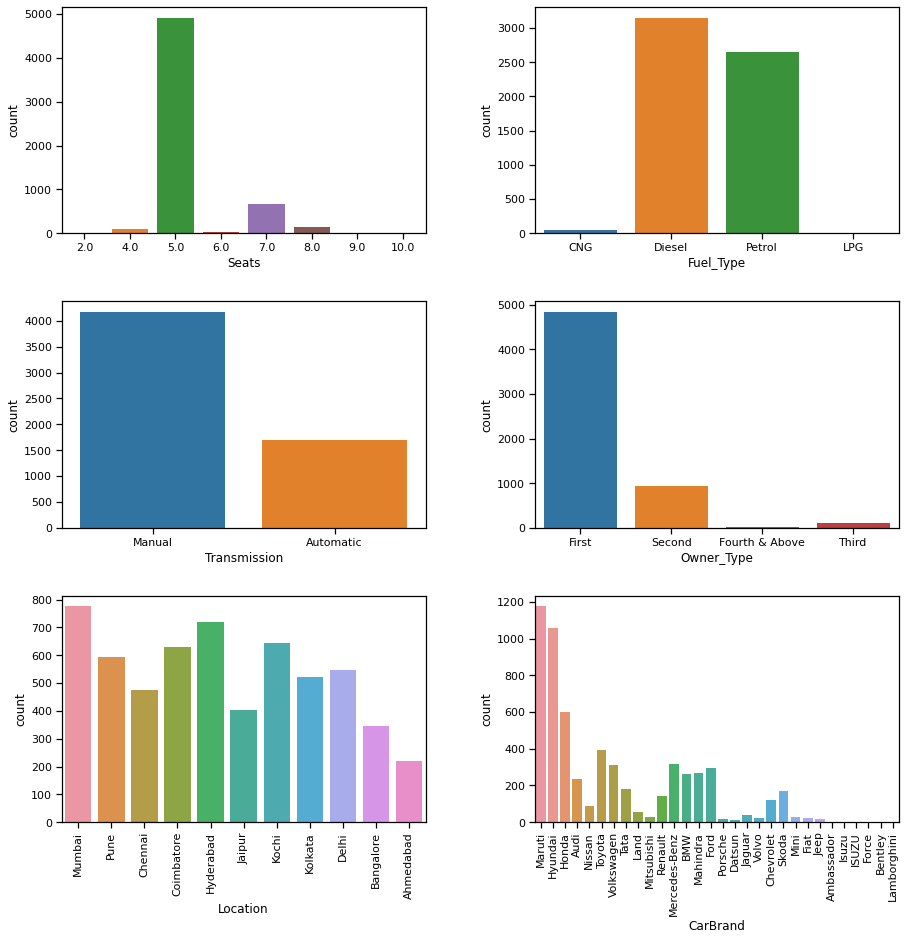

In [29]:
# Analysing the categorical variables

f,ax = plt.subplots(3,2,figsize=[15,15])
plt.subplots_adjust(hspace = 0.3,wspace=0.3)

sns.countplot(usedcar_train['Seats'],ax=ax[0][0])
sns.countplot(usedcar_train['Fuel_Type'],ax=ax[0][1])
sns.countplot(usedcar_train['Transmission'],ax=ax[1][0])
sns.countplot(usedcar_train['Owner_Type'],ax=ax[1][1])

sns.countplot(usedcar_train['Location'],ax=ax[2][0])
ax[2][0].tick_params('x',labelrotation = 90)

sns.countplot(usedcar_train['CarBrand'],ax=ax[2][1])
ax[2][1].tick_params('x',labelrotation = 90)

plt.show()

**Observation:** 
- Most of the used car vehicles are 5 steater from brands Maruthi,Hyundai and Honda
- Diesel and petrol with Manual transmission are more widely available in the used cars list
- Most of the used cars are from first owners
- Most of the used cars are from the locations Mumbai, Hyderabad followed by Kochi and coimbatore almost having close values

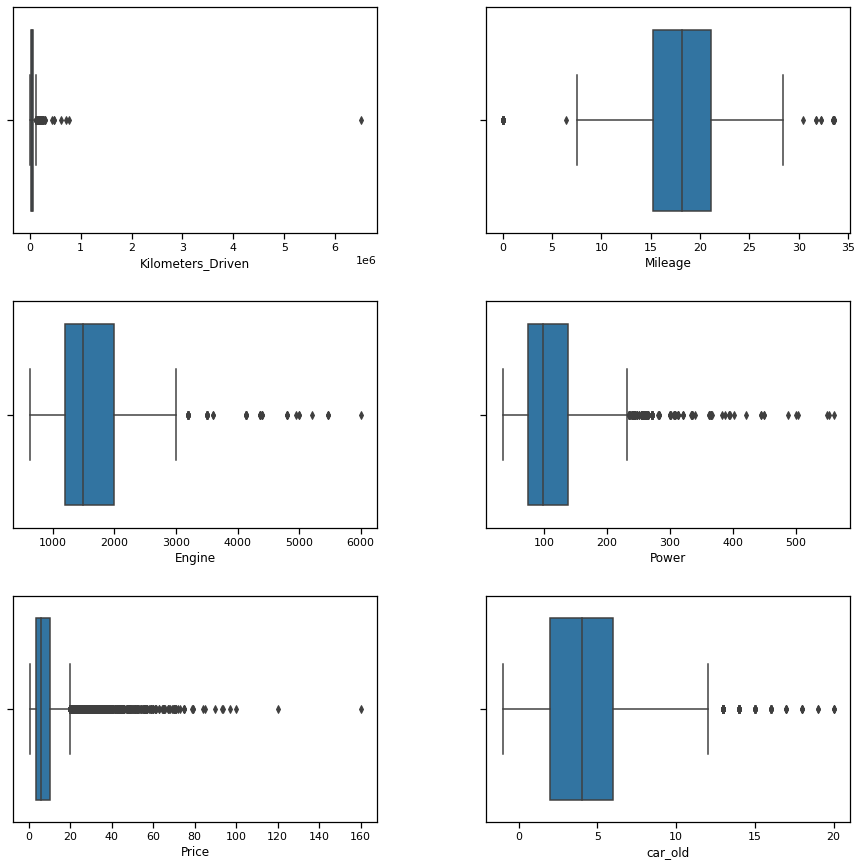

In [30]:
# Analysing the numeric variables
f,ax = plt.subplots(3,2,figsize=[15,15])
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
sns.boxplot(usedcar_train['Kilometers_Driven'], ax = ax[0][0])
sns.boxplot(usedcar_train['Mileage'], ax = ax[0][1])
sns.boxplot(usedcar_train['Engine'], ax = ax[1][0])
sns.boxplot(usedcar_train['Power'], ax = ax[1][1])
sns.boxplot(usedcar_train['Price'], ax = ax[2][0])
sns.boxplot(usedcar_train['car_old'], ax = ax[2][1])

plt.show()

Since there are significant outliers in each numeric variable, we can cap them to a reasonable high value so it doesn't skew the analysis

In [31]:
#Capping the outliers to a reasonable maximum value to avoid skewness in our analysis

usedcar_train.loc[usedcar_train['Kilometers_Driven']>=100000,'Kilometers_Driven'] = 100000
usedcar_train.loc[usedcar_train['Mileage']>=27,'Mileage'] = 27
usedcar_train.loc[usedcar_train['Mileage']<=7,'Mileage'] = 7
usedcar_train.loc[usedcar_train['Engine']>=2500,'Engine'] = 2500
usedcar_train.loc[usedcar_train['Power'] >= 200,'Power'] = 200
usedcar_train.loc[usedcar_train['Price']>=18,'Price'] = 18
usedcar_train.loc[usedcar_train['car_old']>=10,'car_old'] = 10

Capping the mximum values of the variables to treat outliers as
- Kilometers_Driven : max 100000 km
- Mileage: max 27 and min 7 (kmpl or km/kg)
- Engine: max 2500 CC
- Power: max 200 hp
- Price: max 18 lakhs
- car_old: max 10 years


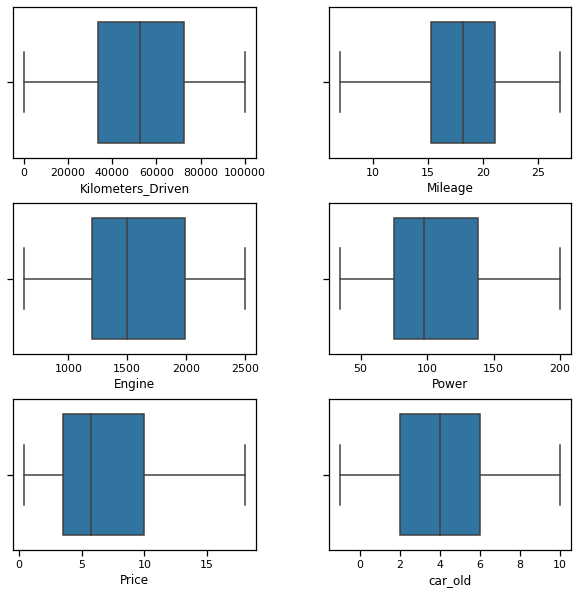

In [32]:
# Re verifying the presence of outliers
f,ax = plt.subplots(3,2,figsize=[10,10])
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
sns.boxplot(usedcar_train['Kilometers_Driven'], ax = ax[0][0])
sns.boxplot(usedcar_train['Mileage'], ax = ax[0][1])
sns.boxplot(usedcar_train['Engine'], ax = ax[1][0])
sns.boxplot(usedcar_train['Power'], ax = ax[1][1])
sns.boxplot(usedcar_train['Price'], ax = ax[2][0])
sns.boxplot(usedcar_train['car_old'], ax = ax[2][1])

plt.show()

The outliers are not treated and hence the dataframe can be used for further analysis

## Step 4: Bivariate Analysis

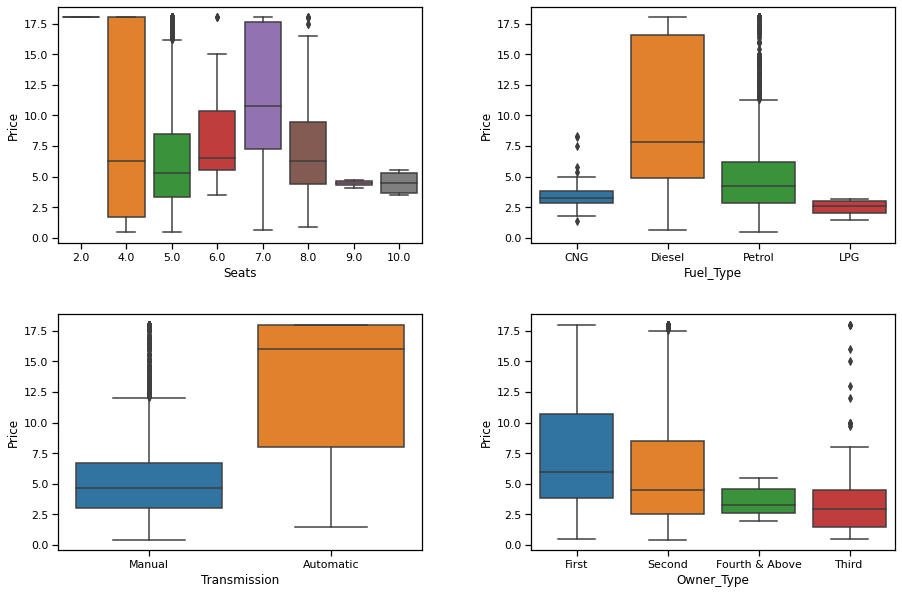

In [33]:
# Analysing the categorical variables with the target variable
f,ax = plt.subplots(3,2,figsize=[15,10])
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)

plt.subplot(2,2,1)
sns.boxplot(x= 'Seats', y = 'Price',data=usedcar_train)
plt.subplot(2,2,2)
sns.boxplot(x= 'Fuel_Type', y = 'Price',data=usedcar_train)
plt.subplot(2,2,3)
sns.boxplot(x= 'Transmission', y = 'Price',data=usedcar_train)
plt.subplot(2,2,4)
sns.boxplot(x= 'Owner_Type', y = 'Price',data=usedcar_train)

plt.show()

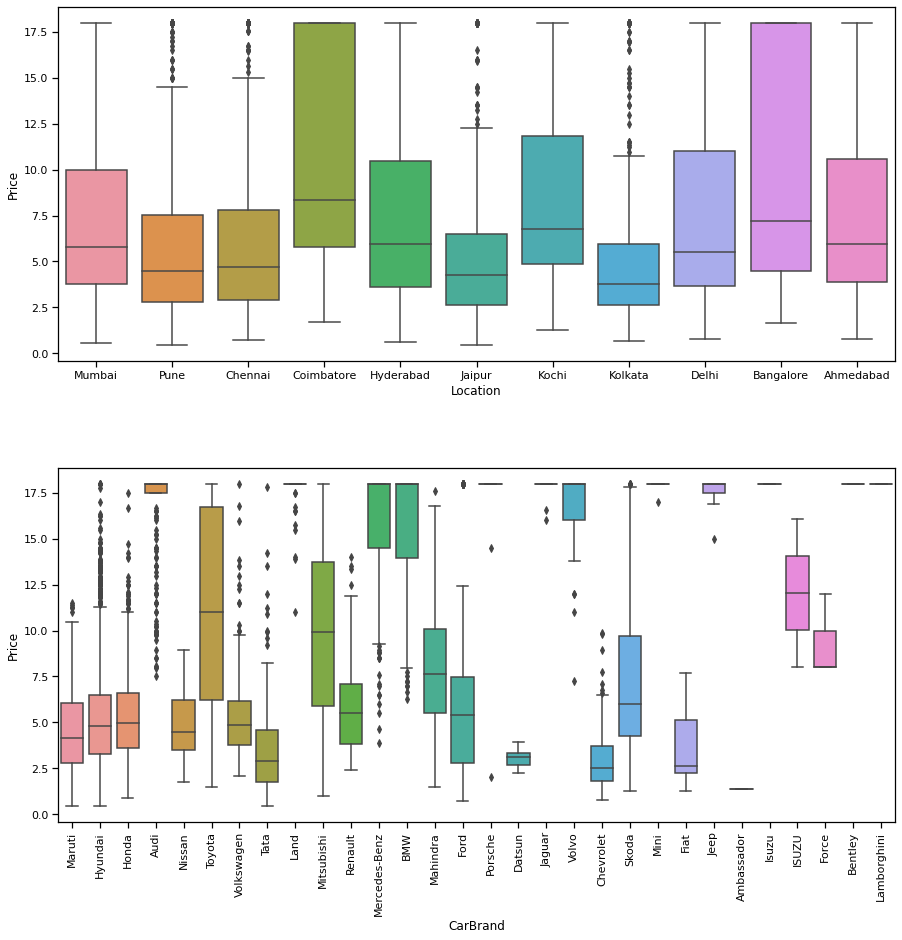

In [34]:
f,ax = plt.subplots(2,1,figsize=[15,15])
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)

sns.boxplot(x= 'Location', y = 'Price',data=usedcar_train,ax=ax[0])
sns.boxplot(x= 'CarBrand', y = 'Price',data=usedcar_train,ax= ax[1])
ax[1].tick_params('x',labelrotation=90)

plt.show()

**Observation:**
- It is clear that 4-seater used cars are found in almost all the price ranges. Similarly with Diesel compared to other fuel type cars
- In transmission, the automatic geared cars have higher prices compared to manual geared cars
- Likewise, first owner cars are having higher prices compared to second owners and so on.

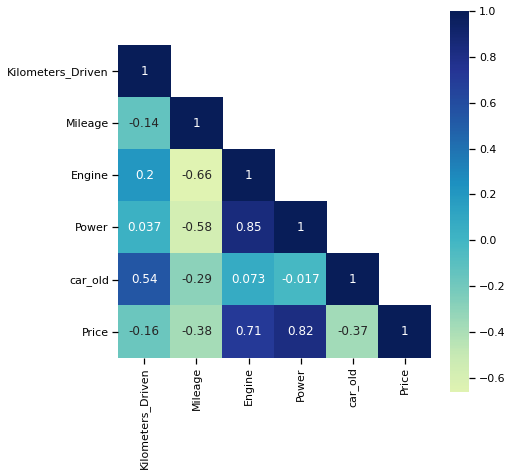

In [35]:
# Finding the correaltion between the numeric variables
plt.figure(figsize = [7,7])
correlation = usedcar_train[['Kilometers_Driven','Mileage','Engine','Power','car_old','Price']].corr()
corr_mask = np.array(correlation)
corr_mask[np.tril_indices_from(corr_mask)] = False

sns.heatmap(correlation,mask = corr_mask,square= True, cmap = "YlGnBu",annot = True,center = 0.0)
plt.show()

**Observation:**
- It is not suprising that the variables 'Power' and 'Engine' have a strong positive correlation with the target variable 'Price'
- The older the car and Mileage of car have a decent negative correlation with Price.
- The kilometers driven by the car has the least correlation with the price

## Step 5: Data Preperation

Here, we prepare the data in a format that makes our modelling part easier

Now, since we have created the 'car_old' variable from the 'Year', this variable can be dropped as it provides the same information. Similarly, the variable 'Name' can be dropped as well as we have extracted the variable 'CarBrand'

In [36]:
usedcar_train.drop('Year',axis = 1,inplace = True)
usedcar_train.drop('Name',axis = 1,inplace = True)

usedcar_test.drop('Year',axis = 1,inplace = True)
usedcar_test.drop('Name',axis = 1,inplace = True)

**Creating dummy variables**

In [37]:
train_location = pd.get_dummies(usedcar_train['Location'],drop_first = True)
train_fuelType = pd.get_dummies(usedcar_train[['Fuel_Type']],drop_first = True)
train_transmission = pd.get_dummies(usedcar_train[['Transmission']], drop_first= True)
train_Owner_Type = pd.get_dummies(usedcar_train[['Owner_Type']],drop_first= True)
train_seats = pd.get_dummies(usedcar_train[['Seats']],drop_first = True)
train_CarBrand=pd.get_dummies(usedcar_train['CarBrand'],drop_first=True)

# Doing the same changs on test data
test_location = pd.get_dummies(usedcar_test['Location'],drop_first = True)
test_fuelType = pd.get_dummies(usedcar_test[['Fuel_Type']],drop_first = True)
test_transmission = pd.get_dummies(usedcar_test[['Transmission']],drop_first= True)
test_Owner_Type = pd.get_dummies(usedcar_test[['Owner_Type']],drop_first= True)
test_seats = pd.get_dummies(usedcar_test[['Seats']],drop_first = True)
test_CarBrand=pd.get_dummies(usedcar_test['CarBrand'],drop_first=True)

In [38]:
#merging the dummy variables to the respective datasets

usedcar_train = pd.concat([usedcar_train,train_location,train_fuelType,train_transmission,train_Owner_Type,train_seats,train_CarBrand],axis = 1)
usedcar_test = pd.concat([usedcar_test,test_location,test_fuelType,test_transmission,test_Owner_Type,test_seats,test_CarBrand], axis = 1)

In [39]:
# Dropping off main variables from which dummy variables are created
usedcar_train.drop(['Location','Fuel_Type','Transmission','Owner_Type','Seats','CarBrand'],axis = 1,inplace = True)
usedcar_test.drop(['Location','Fuel_Type','Transmission','Owner_Type','Seats','CarBrand'],axis = 1, inplace = True)

In [40]:
#Scaling the numeric variables using StandardScaler.For better analysis, the dataframe is assigned to a new variable
scaler = StandardScaler()

#Spltting the train dataset to train and test for comparing the r2 metric on test and train data
usedcar_train_split_traindf, usedcar_train_split_testdf = train_test_split(usedcar_train,train_size = 0.7,test_size = 0.3, random_state=100)

# Applying fit and transform on training data
usedcar_train_split_traindf[['Kilometers_Driven','Mileage','Engine','Power','car_old']] = scaler.fit_transform(usedcar_train_split_traindf[['Kilometers_Driven','Mileage','Engine','Power','car_old']])

# Applying only trasnform on the test data with the learned coefficients from the trainig data
usedcar_train_split_testdf[['Kilometers_Driven','Mileage','Engine','Power','car_old']] = scaler.transform(usedcar_train_split_testdf[['Kilometers_Driven','Mileage','Engine','Power','car_old']])

#Applying the trasnform on the original test data to be predicted as well
usedcar_test[['Kilometers_Driven','Mileage','Engine','Power','car_old']] = scaler.transform(usedcar_test[['Kilometers_Driven','Mileage','Engine','Power','car_old']])



## Step 6: Building Linear Regression Model


In [41]:
# Splitting the train dataset into x and y
y_train = usedcar_train_split_traindf.pop('Price')
X_train = usedcar_train_split_traindf

In [42]:
# considering 30 variables for initial model
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,30)
rfe = rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Kilometers_Driven', False, 18),
 ('Mileage', False, 11),
 ('Engine', False, 20),
 ('Power', True, 1),
 ('car_old', True, 1),
 ('Bangalore', False, 5),
 ('Chennai', False, 24),
 ('Coimbatore', False, 7),
 ('Delhi', False, 15),
 ('Hyderabad', False, 6),
 ('Jaipur', False, 26),
 ('Kochi', False, 19),
 ('Kolkata', True, 1),
 ('Mumbai', False, 17),
 ('Pune', False, 27),
 ('Fuel_Type_Diesel', False, 2),
 ('Fuel_Type_LPG', False, 9),
 ('Fuel_Type_Petrol', False, 25),
 ('Transmission_Manual', False, 4),
 ('Owner_Type_Fourth & Above', False, 8),
 ('Owner_Type_Second', False, 13),
 ('Owner_Type_Third', False, 14),
 ('Seats_4.0', False, 28),
 ('Seats_5.0', True, 1),
 ('Seats_6.0', False, 22),
 ('Seats_7.0', False, 16),
 ('Seats_8.0', False, 10),
 ('Seats_9.0', False, 21),
 ('Seats_10.0', False, 3),
 ('Audi', True, 1),
 ('BMW', True, 1),
 ('Bentley', True, 1),
 ('Chevrolet', True, 1),
 ('Datsun', True, 1),
 ('Fiat', True, 1),
 ('Force', False, 12),
 ('Ford', True, 1),
 ('Honda', True, 1),
 ('Hy

In [44]:
considered_cols = X_train.columns[rfe.support_]

In [45]:
considered_cols

Index(['Power', 'car_old', 'Kolkata', 'Seats_5.0', 'Audi', 'BMW', 'Bentley',
       'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'ISUZU',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [46]:
X_train_rfe = X_train[considered_cols]

In [47]:
# Creating a user defined function for calculating VIF metric

def vif_result(df):
    vif=pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending = False)
    return vif

#### Building Model 1

In [48]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()

print(lr_1.summary())
vif_result(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:50:51   Log-Likelihood:                -8144.5
No. Observations:                4110   AIC:                         1.635e+04
Df Residuals:                    4079   BIC:                         1.655e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.6484      0.407     23.706

,Features,VIF
3,Seats_5.0,12.24
12,Hyundai,3.46
0,Power,3.29
19,Maruti,3.25
11,Honda,2.41
20,Mercedes-Benz,2.39
5,BMW,2.33
4,Audi,1.88
28,Volkswagen,1.70
10,Ford,1.54


The considered threhold value for VIF is 5 and the p-value is 0.05, any variable that has metrics beyond this value can be dropped. In this case, the variable 'ISUZU' is having high p-value (0.061) which is greater than our threshold value (0.05). Hence this variable can be dropped and the model can be build again

#### Building model 2

In [49]:
X_train_rfe.drop(['ISUZU'],axis = 1, inplace = True)

In [50]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())
vif_result(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1137.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:50:52   Log-Likelihood:                -8146.3
No. Observations:                4110   AIC:                         1.635e+04
Df Residuals:                    4080   BIC:                         1.654e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8156      0.397     24.712

,Features,VIF
3,Seats_5.0,12.19
12,Hyundai,3.45
0,Power,3.28
18,Maruti,3.24
11,Honda,2.40
19,Mercedes-Benz,2.39
5,BMW,2.33
4,Audi,1.88
27,Volkswagen,1.70
10,Ford,1.54


The variable 'Toyota' has high p-value > 0.05. Hence this variable can be dropped and the model can be built again

#### Building model 3

In [51]:
X_train_rfe.drop(['Toyota'],axis = 1, inplace = True)

In [52]:
X_train_lm3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_3.summary())
vif_result(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1177.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:50:53   Log-Likelihood:                -8148.1
No. Observations:                4110   AIC:                         1.635e+04
Df Residuals:                    4081   BIC:                         1.654e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.5444      0.113     93.241

,Features,VIF
3,Seats_5.0,10.70
12,Hyundai,3.21
18,Maruti,3.11
0,Power,3.03
11,Honda,2.23
19,Mercedes-Benz,2.17
5,BMW,2.12
4,Audi,1.74
26,Volkswagen,1.63
10,Ford,1.48


Also, the variable 'Seats_5.0' got higher VIF > 5 indicating multi collinearity. Hence, this variable can be dropped

#### Building model 4

In [53]:
X_train_rfe.drop(['Seats_5.0'],axis = 1, inplace = True)

In [54]:
X_train_lm4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr_4.summary())
vif_result(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1164.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:50:54   Log-Likelihood:                -8234.9
No. Observations:                4110   AIC:                         1.653e+04
Df Residuals:                    4082   BIC:                         1.670e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0022      0.108     92.892

,Features,VIF
0,Power,2.92
4,BMW,1.45
17,Maruti,1.40
18,Mercedes-Benz,1.39
3,Audi,1.29
2,Kolkata,1.12
11,Hyundai,1.11
12,Jaguar,1.07
15,Land,1.06
24,Tata,1.04


After droping the variable 'Seats_5.0, the variable 'Jeep' has become insignificant, hence this variable can be dropped as well

#### Building model 5

In [55]:
X_train_rfe.drop(['Jeep'],axis = 1, inplace = True)

In [56]:
X_train_lm5 = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr_5.summary())
vif_result(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:50:55   Log-Likelihood:                -8236.3
No. Observations:                4110   AIC:                         1.653e+04
Df Residuals:                    4083   BIC:                         1.670e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0302      0.106     94.254

,Features,VIF
0,Power,2.89
4,BMW,1.44
16,Maruti,1.40
17,Mercedes-Benz,1.38
3,Audi,1.28
2,Kolkata,1.12
11,Hyundai,1.11
12,Jaguar,1.07
14,Land,1.06
23,Tata,1.04


Now the all the variables have metrics in the accepted region. Hence, it can be considered as our final mode

## Predictions using the final model

In [57]:
y_train_pred = lr_5.predict(X_train_lm5)

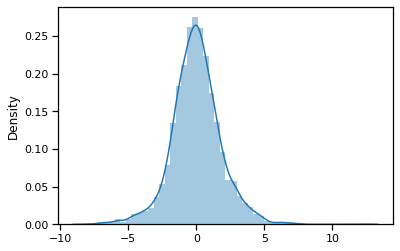

In [58]:
# Analysing the residual
sns.distplot((y_train - y_train_pred))
plt.show()

The variable has error terms uniformly distributed, Hence, the interpretation of predictors from this model can be considered valid

Before prediciting the variables, another point to be noted is that the variables 'Audi' and 'Lamborghini' are unavailable in test dataset, thus, But to predict the price of the usedcars on test data, the same variables have to be available in the test dataset that are in our final model. For this reason, we are creating this two variables and assigining their values to 0.

In [59]:
usedcar_train_split_testdf.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,car_old,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,...,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1164,0.725286,1.052187,0.049891,0.204598,8.25,-0.493262,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4285,0.323731,-0.313767,-0.770353,-0.675053,2.60,1.247214,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
281,0.037627,-0.313767,-0.156704,0.204598,4.21,0.899119,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2248,-0.841047,0.501013,-0.666032,-0.404213,4.65,-0.493262,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2520,-0.878448,0.285336,0.806725,0.737018,16.61,-0.841357,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
# Predicting the test dataset
y_test = usedcar_train_split_testdf.pop('Price')
X_test = usedcar_train_split_testdf[X_train_rfe.columns]

x_test_lm5 = sm.add_constant(X_test)
y_test_pred = lr_5.predict(x_test_lm5)

#### Model Evaluation

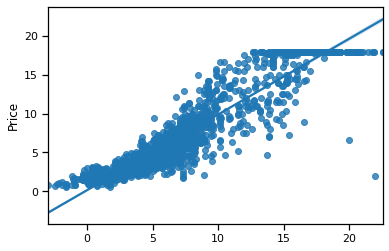

In [61]:
# Analysing the predicted vs actual y test

sns.regplot(x = y_test_pred, y= y_test)
plt.show()

#### Checking the R-squared value

In [62]:
# checkinf the R-Squared value of the y test to check the accuracy of the model on the test data
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8735196942102753

- The R2 for train data  = 0.884
- The R2 for test dat = 0.87

Since the R2 score is close to the train and test data, the model can be considered stable and providing good accuracy for predciting the used car price

### Predicting the price on the actual test dataset

Before doing the actual prediction, it has been observed that the variables 'Audi' and 'Lamborghini' are not availabel in the datafram usedcar_test. Hence these variable can be added with value assiged as 0

In [63]:
usedcar_test['Audi'] = 0
usedcar_test['Lamborghini'] = 0

In [64]:
usedcar_test_X_test  = usedcar_test[X_train_rfe.columns]
usedcar_test_X_test_lm5 = sm.add_constant(usedcar_test_X_test)

In [65]:
# Doing the prediction on the provided test data set
usedcar_test_y_pred = lr_5.predict(usedcar_test_X_test_lm5)

In [66]:
usedcar_test['Predicted_price']=usedcar_test_y_pred

In [67]:
usedcar_test.head(10)

,Kilometers_Driven,Mileage,Engine,Power,car_old,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,...,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Audi,Lamborghini,Predicted_price
0,-0.499930,3.343156,-1.177406,-1.179695,-0.145167,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.810201
1,0.018258,1.531469,-1.590596,-1.432016,0.202929,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.430119
2,-0.764641,-1.109376,1.676060,0.894430,-1.189452,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14.836135
4,-0.955657,0.045694,-0.770353,-0.609079,-0.145167,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.085356
5,1.206990,-0.553408,1.238324,0.713870,-0.841357,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.804493
6,0.190440,-1.380170,2.880857,1.378238,-0.493262,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14.839998
7,0.419660,0.668761,-1.553777,-1.249141,0.202929,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.621024
8,0.457863,-0.313767,-0.156704,0.204598,0.899119,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.611720
9,0.025555,-0.769085,1.238324,0.713870,-0.493262,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.129982
10,0.916302,-1.320260,0.806725,1.352774,0.551024,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.745262


#### Result Summary

- The variables with negative coefficients indicate that with increase in those predictors the price value will be decreased and vice verse. 
- It is apparent from the model that, luxury brands such as Audi, BMW have higher price value compared to other brands